In [1]:
import pandas as pd

# Load your dataset
# Assuming your dataset is in a CSV file named 'customer_data.csv'
data = pd.read_excel('Open Prediction with Format reasons and segment (S, N, W & E).xlsx')

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocess the data for K-means clustering
# Select numerical columns for clustering
features = ['CLV', 'Total Premium Payable (Overall)', 'Average Discount (Overall)']
churned_data = data[data['Predicted Churn Label'] == 'Yes']  # Focus only on churned customers
X = churned_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Define 3 clusters for simplicity
churned_data['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centroids:\n", centroids)

# Define cluster labels based on centroids
def assign_cluster_labels(row, centroids):
    cluster_id = row['cluster']
    centroid = centroids.loc[cluster_id]

    # Analyze centroid characteristics
    if centroid['Average Discount (Overall)'] < data['Average Discount (Overall)'].quantile(0.5):  # Mid/Low discount
        return 'Priority Customer to Retain'
    elif centroid['Average Discount (Overall)'] >= data['Average Discount (Overall)'].quantile(0.5):  # High discount
        return 'Non-Priority Customer to Retain'
    return 'Not Applicable'

# Assign human-readable cluster labels
churned_data['Churned_customer_segment'] = churned_data.apply(assign_cluster_labels, centroids=centroids, axis=1)

# Save the segmented data
churned_data.to_csv('Churned_Customers_Segmentation_KMeans.csv', index=False)

# Print the segmentation summary
print(churned_data['Churned_customer_segment'].value_counts())


C:\Users\Admin\AppData\Local\Temp\ipykernel_13116\2082038014.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_data['cluster'] = kmeans.fit_predict(X_scaled)


Cluster Centroids:
         CLV  Total Premium Payable (Overall)  Average Discount (Overall)
0  0.038217                     11170.086615                   74.777843
1  0.046542                     13283.849418                   49.630697
2  0.105786                     27427.913505                   70.749709


C:\Users\Admin\AppData\Local\Temp\ipykernel_13116\2082038014.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_data['Churned_customer_segment'] = churned_data.apply(assign_cluster_labels, centroids=centroids, axis=1)


Churned_customer_segment
Non-Priority Customer to Retain    14257
Priority Customer to Retain         8209
Name: count, dtype: int64


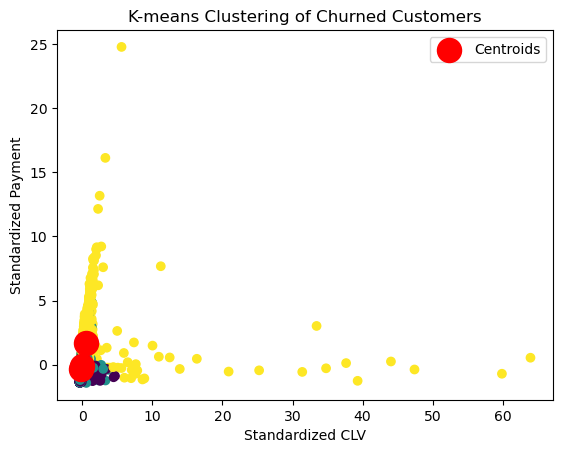

In [3]:
import matplotlib.pyplot as plt

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering of Churned Customers')
plt.xlabel('Standardized CLV')
plt.ylabel('Standardized Payment')
plt.legend()
plt.show()

In [4]:
# Analyze cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)

# Print the cluster centroids with descriptive labels
print("\nCluster Centroids (Original Scale):\n")
for i, centroid in centroids.iterrows():
    print(f"Cluster {i}:")
    print(f"  CLV: {centroid['CLV']:.2f}")
    print(f"  Total Premium Payable (Overall): {centroid['Total Premium Payable (Overall)']:.2f}")
    print(f"  Average Discount (Overall): {centroid['Average Discount (Overall)']:.2f}")
    print("-" * 50)



Cluster Centroids (Original Scale):

Cluster 0:
  CLV: 0.04
  Total Premium Payable (Overall): 11170.09
  Average Discount (Overall): 74.78
--------------------------------------------------
Cluster 1:
  CLV: 0.05
  Total Premium Payable (Overall): 13283.85
  Average Discount (Overall): 49.63
--------------------------------------------------
Cluster 2:
  CLV: 0.11
  Total Premium Payable (Overall): 27427.91
  Average Discount (Overall): 70.75
--------------------------------------------------
